In [2]:
# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Step 2: Set seed for reproducibility
np.random.seed(42)

# Step 3: Load Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# Step 4: Convert data into a DataFrame for easier analysis
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = Malignant, 1 = Benign

# Step 5: Combine features and target into one DataFrame (for full overview)
df = X.copy()
df['target'] = y

# Step 6: Display general information about the dataset
print("Dataset loaded successfully.")
print("Shape of dataset:", df.shape)
print("Target classes:", dict(zip([0, 1], data.target_names)))

# Step 7: Preview the first 5 rows
df.head()


Dataset loaded successfully.
Shape of dataset: (569, 31)
Target classes: {0: np.str_('malignant'), 1: np.str_('benign')}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df['target'].value_counts()

,count
target,
1,357
0,212


Descriptive statistics for each feature:


,mean,50%,std
mean radius,14.127292,13.370000,3.524049
mean texture,19.289649,18.840000,4.301036
mean perimeter,91.969033,86.240000,24.298981
mean area,654.889104,551.100000,351.914129
mean smoothness,0.096360,0.095870,0.014064
mean compactness,0.104341,0.092630,0.052813
mean concavity,0.088799,0.061540,0.079720
mean concave points,0.048919,0.033500,0.038803
mean symmetry,0.181162,0.179200,0.027414
mean fractal dimension,0.062798,0.061540,0.007060


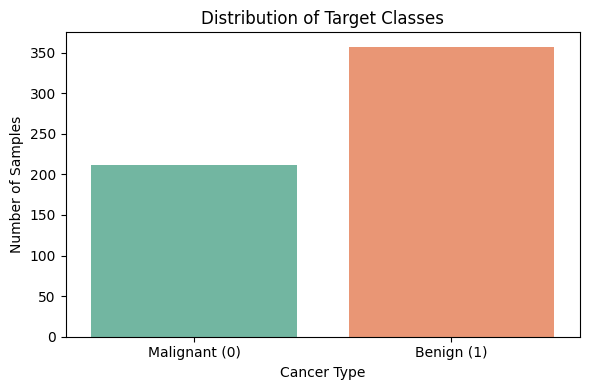

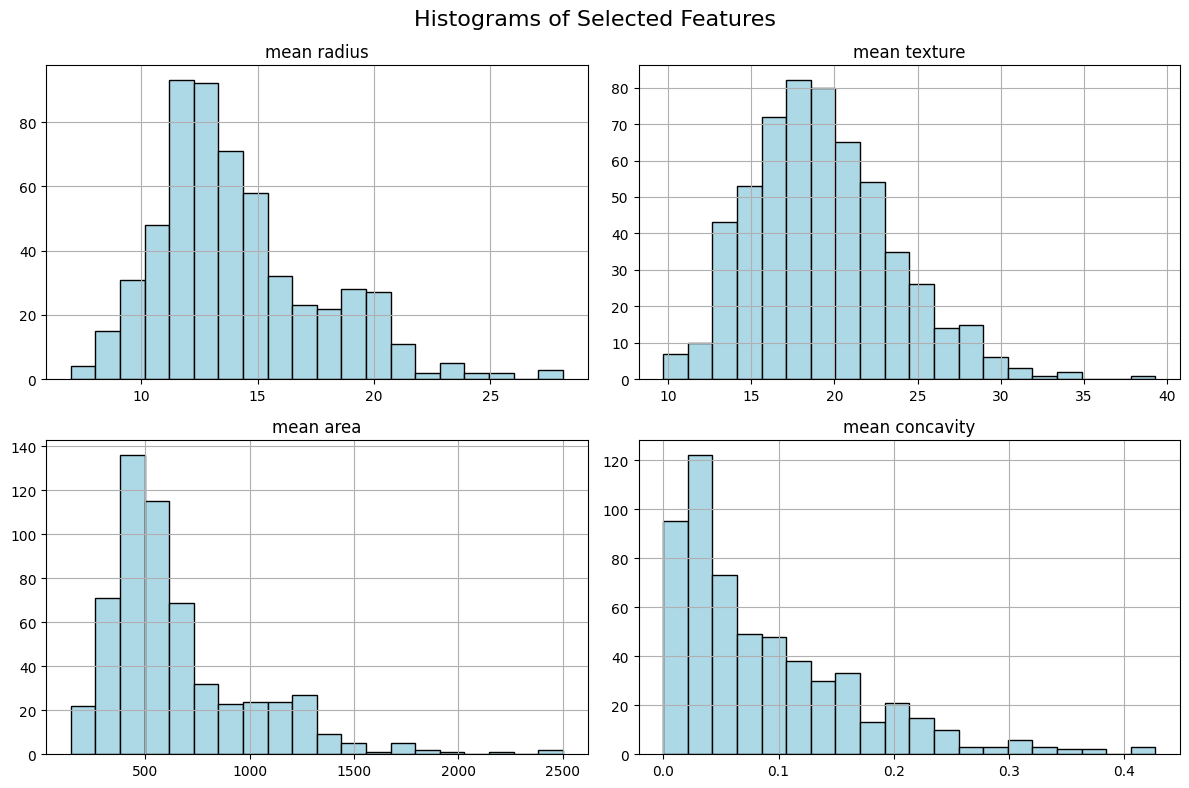

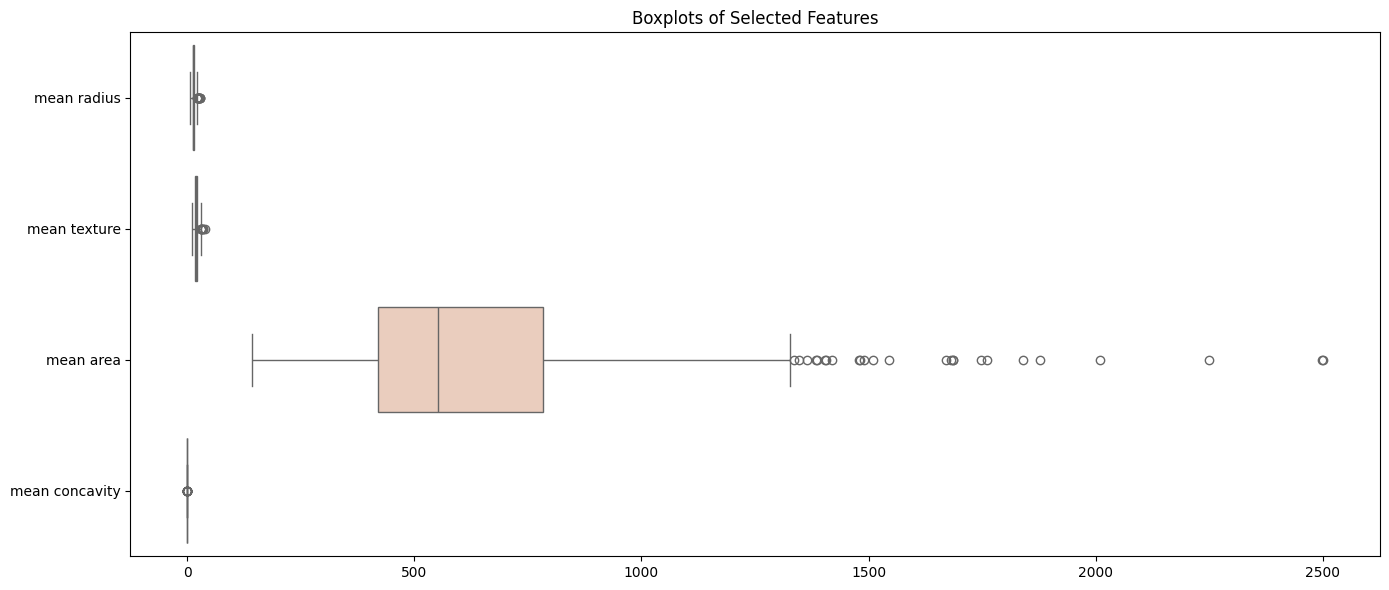

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Descriptive Statistics
eda_stats = df.describe().T[['mean', '50%', 'std']]  # '50%' is the median
print("Descriptive statistics for each feature:")
display(eda_stats)

# Step 2: Class Balance (Warning-free countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='Set2', legend=False)
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.title("Distribution of Target Classes")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# Step 3: Histograms of Selected Features
selected_features = ['mean radius', 'mean texture', 'mean area', 'mean concavity']
df[selected_features].hist(bins=20, figsize=(12, 8), color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

# Step 4: Boxplots to Detect Outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[selected_features], orient="h", palette="coolwarm")
plt.title("Boxplots of Selected Features")
plt.tight_layout()
plt.show()


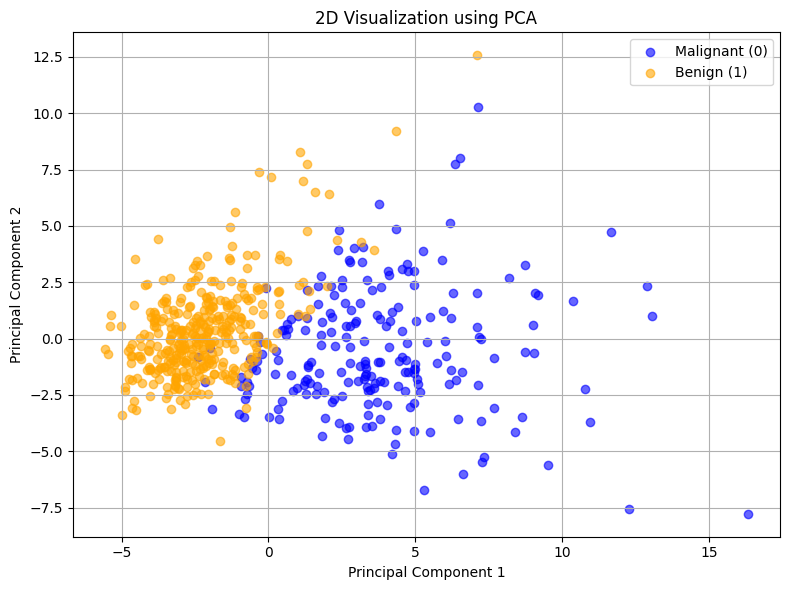

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize the PCA-reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Malignant (0)', alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='orange', label='Benign (1)', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization using PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Define classifiers
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 3: Prepare stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# (We’ll use skf to evaluate the models in the next task)
print("Models initialized and data is ready for cross-validation.")


Models initialized and data is ready for cross-validation.


In [8]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Step 1: Prepare to collect results
lr_f1_scores = []
lr_auc_scores = []
knn_f1_scores = []
knn_auc_scores = []

# Step 2: Run cross-validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Logistic Regression
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # for AUC

    lr_f1_scores.append(f1_score(y_test, y_pred_lr))
    lr_auc_scores.append(roc_auc_score(y_test, y_prob_lr))

    # Train KNN
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # for AUC

    knn_f1_scores.append(f1_score(y_test, y_pred_knn))
    knn_auc_scores.append(roc_auc_score(y_test, y_prob_knn))

# Step 3: Show mean scores
print("Logistic Regression:")
print("Average F1-score:", np.mean(lr_f1_scores))
print("Average AUC:", np.mean(lr_auc_scores))

print("\n K-Nearest Neighbors:")
print("Average F1-score:", np.mean(knn_f1_scores))
print("Average AUC:", np.mean(knn_auc_scores))


Logistic Regression:
Average F1-score: 0.9794339645403476
Average AUC: 0.9953136995963723

 K-Nearest Neighbors:
Average F1-score: 0.9740150395624335
Average AUC: 0.9849628347171748


In [10]:
# Define subsets
feature_sets = [
    ['mean radius', 'mean texture'],
    ['mean area', 'mean concavity'],
    ['mean radius', 'mean texture', 'mean concavity']
]

# Initialize results storage
subset_results = []

for features in feature_sets:
    X_subset = df[features].values
    X_scaled_subset = scaler.fit_transform(X_subset)

    # Temp storage for cross-validation results
    lr_f1 = []
    lr_auc = []
    knn_f1 = []
    knn_auc = []

    for train_idx, test_idx in skf.split(X_scaled_subset, y):
        X_train, X_test = X_scaled_subset[train_idx], X_scaled_subset[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Logistic Regression
        lr_model.fit(X_train, y_train)
        y_pred_lr = lr_model.predict(X_test)
        y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
        lr_f1.append(f1_score(y_test, y_pred_lr))
        lr_auc.append(roc_auc_score(y_test, y_prob_lr))

        # KNN
        knn_model.fit(X_train, y_train)
        y_pred_knn = knn_model.predict(X_test)
        y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
        knn_f1.append(f1_score(y_test, y_pred_knn))
        knn_auc.append(roc_auc_score(y_test, y_prob_knn))

    # Store average results
    subset_results.append({
        'features': features,
        'LR_F1': np.mean(lr_f1),
        'LR_AUC': np.mean(lr_auc),
        'KNN_F1': np.mean(knn_f1),
        'KNN_AUC': np.mean(knn_auc)
    })

# Display the results
import pandas as pd
results_df = pd.DataFrame(subset_results)
print("Subset evaluation complete:")
display(results_df)


Subset evaluation complete:


,features,LR_F1,LR_AUC,KNN_F1,KNN_AUC
0,"[mean radius, mean texture]",0.916875,0.951969,0.908433,0.930267
1,"[mean area, mean concavity]",0.926271,0.973403,0.930915,0.956752
2,"[mean radius, mean texture, mean concavity]",0.939263,0.980410,0.933565,0.961067


In [11]:
# Step 1: Expand results into two rows per subset (one for LR, one for KNN)
compiled_data = []

for row in subset_results:
    features = ", ".join(row['features'])
    compiled_data.append({
        'Features': features,
        'Model': 'Logistic Regression',
        'F1-Score': row['LR_F1'],
        'AUC': row['LR_AUC']
    })
    compiled_data.append({
        'Features': features,
        'Model': 'K-Nearest Neighbors',
        'F1-Score': row['KNN_F1'],
        'AUC': row['KNN_AUC']
    })

# Step 2: Create DataFrame
compiled_df = pd.DataFrame(compiled_data)

# Step 3: Display the table
print("Compiled Results Table:")
display(compiled_df)

# Step 4: Calculate mean and std for each model
summary_stats = compiled_df.groupby('Model')[['F1-Score', 'AUC']].agg(['mean', 'std'])
print("Summary Statistics (mean and std):")
display(summary_stats)


Compiled Results Table:


,Features,Model,F1-Score,AUC
0,"mean radius, mean texture",Logistic Regression,0.916875,0.951969
1,"mean radius, mean texture",K-Nearest Neighbors,0.908433,0.930267
2,"mean area, mean concavity",Logistic Regression,0.926271,0.973403
3,"mean area, mean concavity",K-Nearest Neighbors,0.930915,0.956752
4,"mean radius, mean texture, mean concavity",Logistic Regression,0.939263,0.980410
5,"mean radius, mean texture, mean concavity",K-Nearest Neighbors,0.933565,0.961067


Summary Statistics (mean and std):


F1-Score                 AUC          
                         mean       std      mean       std
Model                                                      
K-Nearest Neighbors  0.924305  0.013809  0.949362  0.016677
Logistic Regression  0.927470  0.011242  0.968594  0.014818

In [12]:
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Step 1: Extract scores for each model (from the compiled_df)
lr_f1 = compiled_df[compiled_df['Model'] == 'Logistic Regression']['F1-Score'].values
knn_f1 = compiled_df[compiled_df['Model'] == 'K-Nearest Neighbors']['F1-Score'].values

lr_auc = compiled_df[compiled_df['Model'] == 'Logistic Regression']['AUC'].values
knn_auc = compiled_df[compiled_df['Model'] == 'K-Nearest Neighbors']['AUC'].values

# Step 2: Test for normality of differences
f1_diff = lr_f1 - knn_f1
auc_diff = lr_auc - knn_auc

f1_normality_p = shapiro(f1_diff).pvalue
auc_normality_p = shapiro(auc_diff).pvalue

print("Shapiro-Wilk Test (F1 diff): p =", f1_normality_p)
print("Shapiro-Wilk Test (AUC diff): p =", auc_normality_p)

# Step 3: Choose and apply the appropriate test
def test_scores(lr, knn, label):
    diff = lr - knn
    normal = shapiro(diff).pvalue > 0.05

    if normal:
        stat, p = ttest_rel(lr, knn)
        test_used = "Paired t-test"
    else:
        stat, p = wilcoxon(lr, knn)
        test_used = "Wilcoxon signed-rank test"

    print(f"\n{label} Comparison:")
    print("Test used:", test_used)
    print("Test statistic:", stat)
    print("p-value:", p)
    if p < 0.05:
        print("→ Reject H₀: Significant difference")
    else:
        print("→ Fail to reject H₀: No significant difference")

# Step 4: Run the tests
test_scores(lr_f1, knn_f1, "F1-score")
test_scores(lr_auc, knn_auc, "AUC")


Shapiro-Wilk Test (F1 diff): p = 0.3822732458610133
Shapiro-Wilk Test (AUC diff): p = 0.9273651236052541

F1-score Comparison:
Test used: Paired t-test
Test statistic: 0.794359943252275
p-value: 0.5102704893944332
→ Fail to reject H₀: No significant difference

AUC Comparison:
Test used: Paired t-test
Test statistic: 13.18141726806935
p-value: 0.005706188451379726
→ Reject H₀: Significant difference


In [13]:
compiled_df.to_csv("compiled_results.csv", index=False)


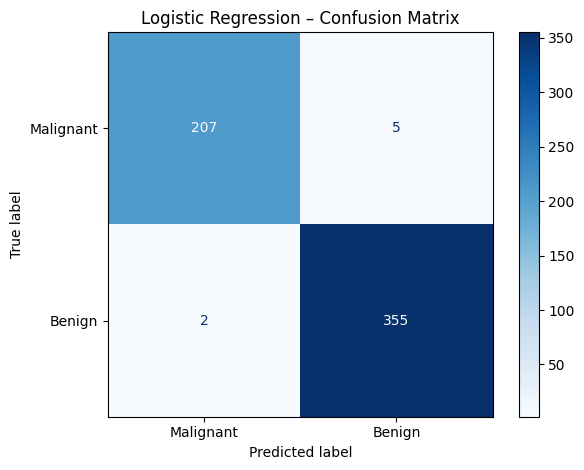

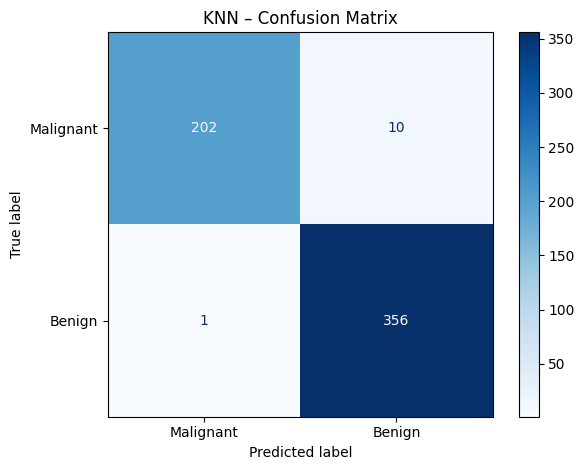

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train on entire data (for demonstration only)
lr_model.fit(X_scaled, y)
knn_model.fit(X_scaled, y)

# Plot confusion matrices
for model, name in zip([lr_model, knn_model], ['Logistic Regression', 'KNN']):
    y_pred = model.predict(X_scaled)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    disp.plot(cmap='Blues')
    plt.title(f'{name} – Confusion Matrix')
    plt.tight_layout()
    plt.show()


In [16]:
try:
    lr_model.fit(X_train, y_train)
except Exception as e:
    print("Error during Logistic Regression training:", e)


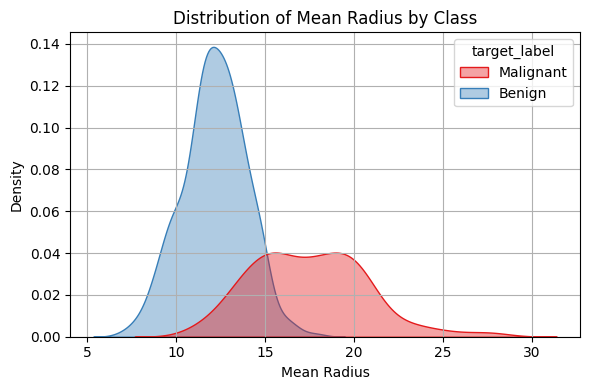

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Create readable labels for the target column
df['target_label'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# STEP 2: Create a KDE plot for one selected feature
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='mean radius', hue='target_label', fill=True, palette='Set1', alpha=0.4)
plt.title('Distribution of Mean Radius by Class')
plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()
